## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined=study_results.merge(mouse_metadata, on='Mouse ID',how='left')
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Grouping the new combined table by Drug
regimen_group=combined.groupby('Drug Regimen')

#Using the agg function to calculate mean, median, var, std and sem
regimenStats=round(regimen_group.agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']}),3)
regimenStats


Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.323  50.855  42.351  6.508  0.513
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar plots

Text(0, 0.5, 'Data Points')

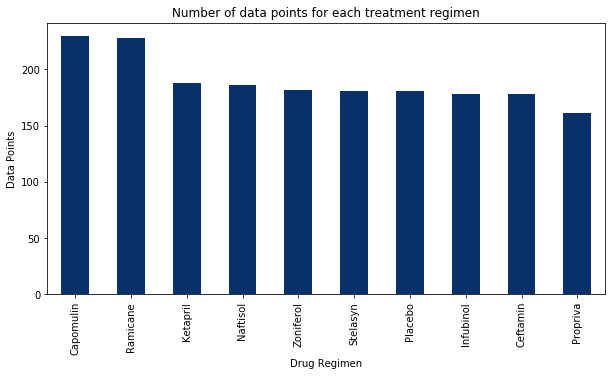

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Counting the data points for each drug
dr_datapoints=combined['Drug Regimen'].value_counts()

#Ploting and editing the data points in a bar chart
barpd=dr_datapoints.plot(kind='bar',title='Number of data points for each treatment regimen',figsize=(10,5),colormap='Blues_r')
barpd.set_xlabel('Drug Regimen')
barpd.set_ylabel('Data Points')

Text(0.5, 1.0, 'Number of data points for each treatment regimen')

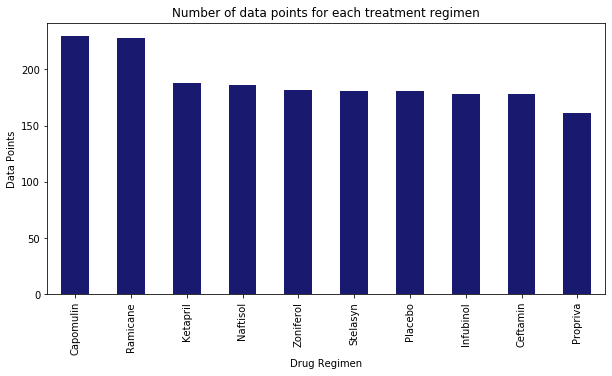

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Ploting the same data point in a similar plot but using pyplot
plt.figure(figsize=(10,5))
plt.bar(dr_datapoints.keys(),dr_datapoints,width=0.5, color='midnightblue')
plt.xticks(rotation='vertical')
plt.xlim(-0.50, len(dr_datapoints.keys())-0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.title('Number of data points for each treatment regimen')

## Pie plots

Text(0, 0.5, '')

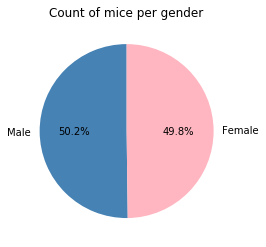

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Counting the values for each gender from the original mice table
sex=mouse_metadata['Sex'].value_counts()


labels=sex.keys() # Getting the 2 genders
values=sex.tolist() #Getting the values

#Ploting it in a Pie chart
colors=['steelblue','lightpink']
title='Count of mice per gender'
piepd=sex.plot(kind='pie',startangle=90,autopct='%1.1f%%',title=title,colors=colors)
piepd.set_ylabel('')

Text(0.5, 1.0, 'Count of mice per gender')

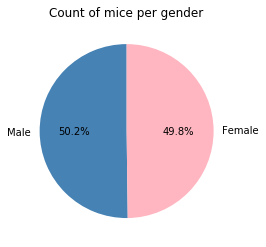

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Ploting the same values in a similar chart using pyplot
plt.pie(values,labels=labels,autopct='%1.1f%%',colors=colors,startangle=90)
plt.title(title)

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Grouping the combined table by Mouse
mice_gr=combined.groupby('Mouse ID')

#Gathering the row number of the max value for each mouse to know when was the last day of treatment for each mouse
timepoint_max_row=mice_gr['Timepoint'].idxmax()

#create a new table only with the indexes gathered before
lastVolMice=combined.loc[timepoint_max_row,:]

#Array of drugs to analyze
promisingtreatment=['Capomulin','Ramicane','Infubinol','Ceftamin']

#create arrays of tumor volumes for each drug
treatmentvalues=[lastVolMice.loc[(lastVolMice['Drug Regimen']==t),'Tumor Volume (mm3)'] for t in promisingtreatment]

#Find the quartiles, the iqr and the upper and lower boundery for the outliers
quartiles=[t.quantile([.25,.5,.75]) for t in treatmentvalues]
lowerq=[quartiles[index][0.25] for index,t in enumerate(treatmentvalues)]
upperq=[quartiles[index][0.75] for index,t in enumerate(treatmentvalues)]
iqr=[upperq[index]-lowerq[index] for index,t in enumerate(treatmentvalues)]
lower_bound=[lowerq[index] - (1.5*iqr[index]) for index,t in enumerate(treatmentvalues)]
upper_bound=[upperq[index] + (1.5*iqr[index]) for index,t in enumerate(treatmentvalues)]

#Store if any outliers
outliers=[treatmentvalues[index].loc[(t<lower_bound[index]) | (t>upper_bound[index])]
          for index,t in enumerate(treatmentvalues)]

#Printing the number of outliers for each treatment
for index,o in enumerate(outliers):
    print(f'The data for mice treated with {promisingtreatment[index]} shows {len(o)} outlier(s)')

The data for mice treated with Capomulin shows 0 outlier(s)
The data for mice treated with Ramicane shows 0 outlier(s)
The data for mice treated with Infubinol shows 1 outlier(s)
The data for mice treated with Ceftamin shows 0 outlier(s)


<function matplotlib.pyplot.show(*args, **kw)>

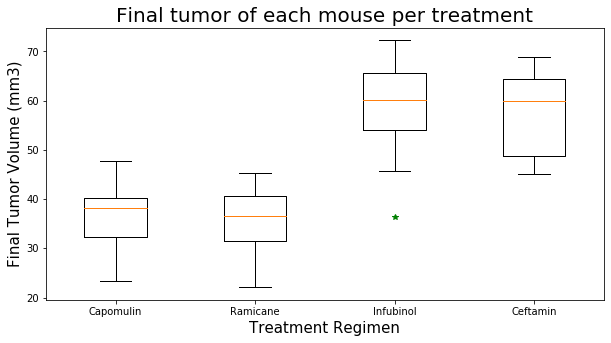

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Ploting it in a boxplot

#Data to plot are the different indexes of the treatmentvalues array
datatoplot=[treatmentvalues[0],treatmentvalues[1],treatmentvalues[2],treatmentvalues[3]]
# Editing the plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
bp = ax.boxplot(datatoplot,sym='g*')
ax.set_xticklabels(promisingtreatment,size=10)
plt.title('Final tumor of each mouse per treatment',size=20)
plt.xlabel('Treatment Regimen',size=15)
plt.ylabel('Final Tumor Volume (mm3)',size=15)
plt.show


In [9]:
#Information about the outlier:
outlierInfubinol=combined.loc[outliers[2].keys(),:]
print("Information about the outlier found in the chart above")
outlierInfubinol

Information about the outlier found in the chart above


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
420,c326,5,36.321346,0,Infubinol,Female,18,25


## Line and scatter plots

             Sex  Age_months  Weight (g)
Mouse ID                                
s185      Female           3          17
x401      Female          16          15
m601        Male          22          17
f966        Male          16          17
u364        Male          18          17
y793        Male          17          17
r554      Female           8          17
m957      Female           3          19
t565      Female          20          17
i738      Female          23          20
w914        Male          24          21
g288        Male           3          19
l897        Male          17          19
b742        Male           7          21
b128      Female           9          22
j246      Female          21          21
j119      Female           7          23
w150        Male          23          23
v923      Female          19          21
g316      Female          22          22
s710      Female           1          23
l509        Male          17          21
r944        Male

Text(0.5, 1.0, 'Treatment evaluation of mouse "l509" ')

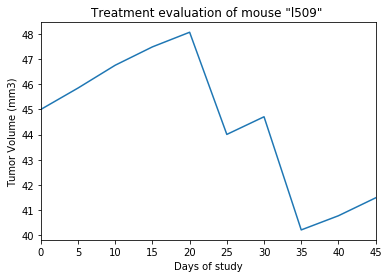

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#creating a new table with the values for the Capomulin drug
capomulin_mice=mouse_metadata.loc[mouse_metadata['Drug Regimen']=='Capomulin',['Mouse ID','Sex','Age_months','Weight (g)']]

#Setting Mouse ID as the index
capomulin_mice=capomulin_mice.set_index('Mouse ID')

#Presenting the user with the different mice that were treated with the Capomulin drug
print(capomulin_mice)

#Ask the user to select the mouse to be studied
mouse=input(f'Choose a mouse from the table above to anlyze \n Mouse ID = ')
#Filtering for the mouse chosen
mouseplot=combined.loc[combined['Mouse ID']==mouse,:]

#Ploting the data about the mouse chosen by the user
mouseplot.plot('Timepoint','Tumor Volume (mm3)',legend=None)
plt.xlabel('Days of study')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Treatment evaluation of mouse "{mouse}" ')

# mouseplot.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

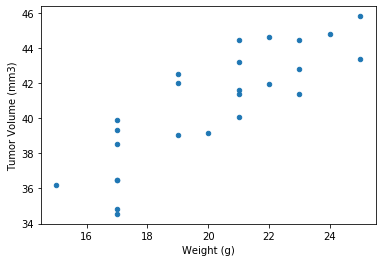

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Copying the combined table since we plan to change it
capomulin_mice=combined.copy()
#Filter for the Capomulin drug as asked
capomulin_mice=capomulin_mice.loc[capomulin_mice['Drug Regimen']=='Capomulin',]

#Group by mouse ID to get the average tumor for all mice treated with the above drug
mice_group=capomulin_mice.groupby('Mouse ID')
#Getting the avg for the tumor. since the weight is constant I also did it for the weight
tumoravg=mice_group['Tumor Volume (mm3)','Weight (g)'].mean()

#ploting it
tumoravg.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')


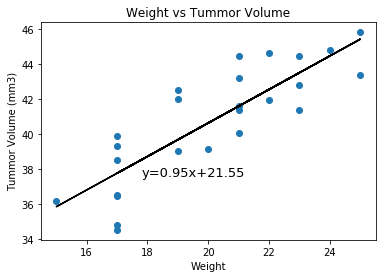

The correlation between the mice weight and tummor volume is ~ 0.84


In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Storing the weigth and the tumor avg in 2 different arays
wei=tumoravg['Weight (g)']
tum=tumoravg['Tumor Volume (mm3)']

#calculating the correlation between the weight and the tummor value
correlation = stats.pearsonr(wei,tum)

#Calculating the values to build the regression line 
(wt_slope, wt_int, wt_r, wt_p, wt_std_err)=stats.linregress(wei,tum)

#y=mx+b m=slope b=interception with the y axis
line=wei*wt_slope+wt_int #calculating the values for y to plot it
line_eq=f'y={round(wt_slope,2)}x+{round(wt_int,2)}' #Creating the equation to plot it

#ploting it
plt.scatter(wei,tum,)
plt.plot(wei,line,'k-')
plt.xlabel('Weight')
plt.ylabel('Tummor Volume (mm3)')
plt.title('Weight vs Tummor Volume')
plt.annotate(line_eq,(17.8,37.6),fontsize=13)
plt.show()
print(f'The correlation between the mice weight and tummor volume is ~ {round(correlation[0],2)}')

In [16]:
#---------------3 OBSERVATIONS----------------------

# 1 - both the Capomulin and Ramicane have significantly lower tumor volume averages and less dispersed 
# data than the remaining drug regimen despite of having considerably more data points

# 2 - There is one outlier for the infubinol regimen finishing the treatment with much lower tumor volume 
# than the remaining mice in the same regimen. Looking a little bit into it, I could not find a reason to 
# explain this outlier since the mouse's weight is also quite high.

# 3 - There seems to be a very strong positive correlation between the weight and the average tumor (0.85).
# Meaning that the heavy the mouse the higher the probability of having a larger tumor volume.